# Intro

## Links

https://canvas.northwestern.edu/courses/167719/assignments/1078603?module_item_id=2319248 

https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction


## Modules

In [1]:
#For data manipulation and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import array 
from numpy import arange 

#For Isolation Forest from sklearn
from sklearn.ensemble import IsolationForest
from enum import auto

#From sklearn (SVM, Logistic, Bayes)
from sklearn.svm import SVC
from sklearn import svm

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RepeatedKFold, StratifiedKFold 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest, f_classif, RFECV

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, ExtraTreesClassifier, RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn import metrics

from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn.metrics import mean_squared_error

#Other
from math import sqrt

## Import Files

In [2]:
#Import data.csv from the Kaggle page linked above
# from google.colab import files
# uploaded = files.upload()

In [87]:
df = pd.read_csv("data.csv")

# EDA

## Intro Stats

In [88]:
df.shape

(6819, 96)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [90]:
# check for missing values
print(df.isna().sum().sum())
print(np.isnan(df).sum().sum())
print(df.isnull().sum().sum())

0
0
0


In [91]:
df.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [92]:
# create a for loop to get the categorical columns with 2 or less than 2 unique values
list_1=[]
for i in df.columns:
  x=df[i].value_counts()
  if len(x)<=2:
    list_1.append(i)
  else:
    continue

In [93]:
# categorical variables (value_counts <= 2 )
list_1

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

### Checking [Bankrupt?]

In [94]:
df['Bankrupt?'].unique()

array([1, 0], dtype=int64)

In [95]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

<AxesSubplot:xlabel='Bankrupt?', ylabel='Count'>

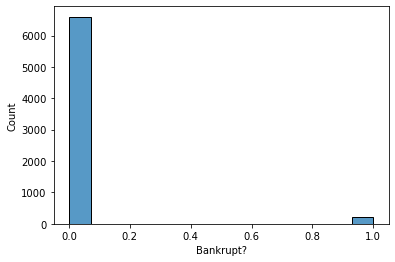

In [96]:
sns.histplot(x="Bankrupt?", data=df)

### Checking [Net Income Flag]

In [97]:
df[' Net Income Flag'].unique()

array([1], dtype=int64)

In [98]:
df[' Net Income Flag'].value_counts()

1    6819
Name:  Net Income Flag, dtype: int64

Every value is a 1 for this feature, so we can drop this column since it doesn't provide us any predictive value.

### Checking [ Liability-Assets Flag]

In [99]:
df[' Liability-Assets Flag'].unique()

array([0, 1], dtype=int64)

In [100]:
df[' Liability-Assets Flag'].value_counts()

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64

This feature may not provide good predictive value to the model since it has a large imbalance between the 0 and 1 classes. Therefore, we can also drop this column.

## Feature Selection

In [101]:
y = df['Bankrupt?']

In [102]:
X = df.drop(columns = ['Bankrupt?',' Liability-Assets Flag',' Net Income Flag'])

In [103]:
# creating KNN classifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)


In [104]:
# create step-wise model for feature selection
sfs1 = SequentialFeatureSelector(knn, n_features_to_select=15, direction='forward', cv=5)

sfs1 = sfs1.fit(X, y)

In [105]:
# get list of selected features
features = X.columns
selected_features = np.array(features)[sfs1.get_support()]
print(selected_features)

[' Operating Profit Rate' ' Interest-bearing debt interest rate'
 ' Realized Sales Gross Profit Growth Rate'
 ' Operating Profit Growth Rate' ' Continuous Net Profit Growth Rate'
 ' Net Value Growth Rate' ' Long-term fund suitability ratio (A)'
 ' Contingent liabilities/Net worth' ' Accounts Receivable Turnover'
 ' Inventory/Working Capital' ' Quick Asset Turnover Rate'
 ' Working capitcal Turnover Rate' ' Cash Flow to Sales'
 ' Fixed Assets to Assets' ' Degree of Financial Leverage (DFL)']


In [106]:
# reassign X to be only the selected features
X = X[selected_features]

In [107]:
X.head()

,Operating Profit Rate,Interest-bearing debt interest rate,Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,Continuous Net Profit Growth Rate,Net Value Growth Rate,Long-term fund suitability ratio (A),Contingent liabilities/Net worth,Accounts Receivable Turnover,Inventory/Working Capital,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Degree of Financial Leverage (DFL)
0,0.998969,0.000725,0.022102,0.848195,0.217535,0.000327,0.005024,0.006479,0.001814,0.276920,6.550000e+09,0.593831,0.671568,0.424206,0.026601
1,0.998946,0.000647,0.022080,0.848088,0.217620,0.000443,0.005059,0.005835,0.001286,0.289642,7.700000e+09,0.593916,0.671570,0.468828,0.264577
2,0.998857,0.000790,0.022760,0.848094,0.217601,0.000396,0.005100,0.006562,0.001495,0.277456,1.022676e-03,0.594502,0.671571,0.276179,0.026555
3,0.998700,0.000449,0.022046,0.848005,0.217568,0.000382,0.005047,0.005366,0.001966,0.276580,6.050000e+09,0.593889,0.671519,0.559144,0.026697
4,0.998973,0.000686,0.022096,0.848258,0.217626,0.000439,0.005303,0.006624,0.001449,0.287913,5.050000e+09,0.593915,0.671563,0.309555,0.024752


In [108]:
# create df1 using X 
df1 = X
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0    Operating Profit Rate                    6819 non-null   float64
 1    Interest-bearing debt interest rate      6819 non-null   float64
 2    Realized Sales Gross Profit Growth Rate  6819 non-null   float64
 3    Operating Profit Growth Rate             6819 non-null   float64
 4    Continuous Net Profit Growth Rate        6819 non-null   float64
 5    Net Value Growth Rate                    6819 non-null   float64
 6    Long-term fund suitability ratio (A)     6819 non-null   float64
 7    Contingent liabilities/Net worth         6819 non-null   float64
 8    Accounts Receivable Turnover             6819 non-null   float64
 9    Inventory/Working Capital                6819 non-null   float64
 10   Quick Asset Turnover Rate          

## Removing Anomalies with Isolation Forests

In [109]:
#Isolation Forest Identifies anomalies
model=IsolationForest(n_estimators=100, contamination=float(.05), random_state=42)
model.fit(X)

C:\Users\sjue\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, random_state=42)

In [110]:
df1['scores'] = model.decision_function(X)
X = X[selected_features]

In [111]:
#Removing anomolies from the dataset
df1['anomaly_score'] = model.predict(X)

df2 = pd.concat([y, df1], axis=1)

df3 = df2[df2['anomaly_score']!=-1]

df4 = df3.drop(columns = ['scores', 'anomaly_score'])
df4.head(10)

,Bankrupt?,Operating Profit Rate,Interest-bearing debt interest rate,Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,Continuous Net Profit Growth Rate,Net Value Growth Rate,Long-term fund suitability ratio (A),Contingent liabilities/Net worth,Accounts Receivable Turnover,Inventory/Working Capital,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Degree of Financial Leverage (DFL)
0,1,0.998969,0.000725,0.022102,0.848195,0.217535,0.000327,0.005024,0.006479,0.001814,0.276920,6.550000e+09,0.593831,0.671568,0.424206,0.026601
2,1,0.998857,0.000790,0.022760,0.848094,0.217601,0.000396,0.005100,0.006562,0.001495,0.277456,1.022676e-03,0.594502,0.671571,0.276179,0.026555
3,1,0.998700,0.000449,0.022046,0.848005,0.217568,0.000382,0.005047,0.005366,0.001966,0.276580,6.050000e+09,0.593889,0.671519,0.559144,0.026697
4,1,0.998973,0.000686,0.022096,0.848258,0.217626,0.000439,0.005303,0.006624,0.001449,0.287913,5.050000e+09,0.593915,0.671563,0.309555,0.024752
5,1,0.998758,0.000716,0.021565,0.847983,0.217566,0.000352,0.004913,0.005749,0.001528,0.276678,2.810000e+09,0.593846,0.671568,0.603193,0.026675
6,0,0.998993,0.000805,0.022112,0.848322,0.217604,0.000352,0.005005,0.008044,0.001662,0.276643,9.560000e+09,0.593893,0.671562,0.355854,0.026622
7,0,0.999009,0.000630,0.022114,0.848082,0.217633,0.000451,0.005640,0.006383,0.001335,0.277275,6.180000e+09,0.593937,0.671572,0.218473,0.027031
8,0,0.998961,0.000737,0.022128,0.848159,0.217654,0.000453,0.005418,0.005366,0.001303,0.277087,9.840000e+09,0.593959,0.671576,0.323861,0.026891
9,0,0.999001,0.000672,0.022118,0.848084,0.217700,0.000445,0.005475,0.005819,0.001469,0.277337,3.600000e+09,0.593936,0.671572,0.254953,0.027243
10,0,0.998978,0.000549,0.022107,0.848238,0.217580,0.000449,0.005811,0.008130,0.001940,0.285101,2.920000e+09,0.593916,0.671572,0.225491,0.026971


## Data Prep

### Split the Data for Training

In [112]:
# create X dataframe with dependent variables
X = df4.drop(columns=['Bankrupt?'], axis=1)
X.shape

(6478, 15)

In [113]:
# create y dataframe for response variable
y = df4['Bankrupt?']

In [114]:
# split data in to training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

### Scale the Data

In [115]:
# use StandardScaler to scale features
scaler = StandardScaler()

#scale the training data
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
# scale test data for model testing
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

# Models

## Random Forest

In [116]:
# Random forest classifier model

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [117]:
# y predictions
y_pred = forest_clf.predict(X_test)

In [118]:
# cross-validation
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=5)
forest_scores.mean()

0.9718258415461888

In [119]:
# random forest model accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_test, y_pred = y_pred)

0.9722222222222222

### Tuning hyperparmeters

In [120]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2, 3, 4],
    'max_features': [5, 10, 15],
    'n_estimators': [100, 500, 1000],
    'criterion': ['gini', 'entropy']
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = forest_clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [121]:
# Fit the grid search to the data
rf_grid = grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


{'criterion': 'gini', 'max_depth': 3, 'max_features': 10, 'n_estimators': 500}

Best paramaters for Random Forest model:

{'criterion': 'gini', 'max_depth': 2, 'max_features': 15, 'n_estimators': 500}

In [122]:
# creating best_parameters variable to be used for other tree models
best_parameters = {
    'max_depth': 2,
    'max_features': 15,
    'n_estimators': 500,
}

In [123]:
# creating random forest model using best parameters
forest_clf_tuned = RandomForestClassifier(**best_parameters, random_state=42)
forest_clf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features=15, n_estimators=500,
                       random_state=42)

In [124]:
# y predictions
y_pred = forest_clf_tuned.predict(X_test)

In [125]:
# cross-validation
forest_clf_tuned_scores = cross_val_score(forest_clf_tuned, X_train, y_train, cv=5)
forest_clf_tuned_scores.mean()

0.9708609629053215

In [126]:
# gradient boosted trees model accuracy
accuracy_score(y_true = y_test, y_pred = y_pred)

0.9714506172839507

In [127]:
# create confusion matrix and add scores to table
cnf_matrix = confusion_matrix(y_test,y_pred)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

results = pd.DataFrame(columns = ['Model', 'TPR', 'FPR', 'precision', 'recall', 'accuracy', 'f1-value'])

#eval
Model = 'Random Forest' 
TPR = [round(num, 2) for num in TPR]
FPR = [round(num, 2) for num in FPR]
precision = [round(num, 2) for num in PPV]
recall = [round(num, 2) for num in TPR]
accuracy = [round(num, 2) for num in ACC]
f1_value = round(f1_score(y_pred, y_test),2)
row = [Model, TPR, FPR, precision, recall, accuracy, f1_value]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,TPR,FPR,precision,recall,accuracy,f1-value
0,Random Forest,"[1.0, 0.08]","[0.92, 0.0]","[0.97, 0.75]","[1.0, 0.08]","[0.97, 0.97]",0.14


## Gradient Boosted Trees

In [128]:
from sklearn.ensemble import GradientBoostingClassifier


In [129]:
# creating gradient boosted trees model using best parameters from RF tuning
gbc = GradientBoostingClassifier(**best_parameters, learning_rate=0.01, random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, max_features=15,
                           n_estimators=500, random_state=42)

In [130]:
y_pred = gbc.predict(X_test)

In [131]:
accuracy_score(y_true = y_test, y_pred = y_pred)

0.9729938271604939

In [132]:
# create confusion matrix and add scores to table
cnf_matrix = confusion_matrix(y_test,y_pred)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#eval
Model = 'Gradient Boosted Trees' 
TPR = [round(num, 2) for num in TPR]
FPR = [round(num, 2) for num in FPR]
precision = [round(num, 2) for num in PPV]
recall = [round(num, 2) for num in TPR]
accuracy = [round(num, 2) for num in ACC]
f1_value = round(f1_score(y_pred, y_test),2)
row = [Model, TPR, FPR, precision, recall, accuracy, f1_value]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,TPR,FPR,precision,recall,accuracy,f1-value
0,Random Forest,"[1.0, 0.08]","[0.92, 0.0]","[0.97, 0.75]","[1.0, 0.08]","[0.97, 0.97]",0.14
1,Gradient Boosted Trees,"[0.99, 0.33]","[0.67, 0.01]","[0.98, 0.59]","[0.99, 0.33]","[0.97, 0.97]",0.43


### Gradient Boosting with Early stopping


In [133]:
# creating gradient boosted tree model with early stopping
gbc = GradientBoostingClassifier(**best_parameters, learning_rate=0.01, random_state=42)
gbc.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
          for y_pred in gbc.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors) + 1

gbc_best = GradientBoostingClassifier(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbc_best.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=260, random_state=42)

In [134]:
y_pred = gbc_best.predict(X_test)

In [135]:
# cross-validation
gbc_best_scores = cross_val_score(gbc_best, X_train, y_train, cv=5)
gbc_best_scores.mean()

0.9658420302104005

In [136]:
# gradient boosted trees with early stopping model accuracy
accuracy_score(y_true = y_test, y_pred = y_pred)

0.9660493827160493

In [137]:
# create confusion matrix and add scores to table
cnf_matrix = confusion_matrix(y_test,y_pred)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#eval
Model = 'Gradient Boosted Trees with Early Stopping' 
TPR = [round(num, 2) for num in TPR]
FPR = [round(num, 2) for num in FPR]
precision = [round(num, 2) for num in PPV]
recall = [round(num, 2) for num in TPR]
accuracy = [round(num, 2) for num in ACC]
f1_value = round(f1_score(y_pred, y_test),2)
row = [Model, TPR, FPR, precision, recall, accuracy, f1_value]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,TPR,FPR,precision,recall,accuracy,f1-value
0,Random Forest,"[1.0, 0.08]","[0.92, 0.0]","[0.97, 0.75]","[1.0, 0.08]","[0.97, 0.97]",0.14
1,Gradient Boosted Trees,"[0.99, 0.33]","[0.67, 0.01]","[0.98, 0.59]","[0.99, 0.33]","[0.97, 0.97]",0.43
2,Gradient Boosted Trees with Early Stopping,"[0.99, 0.31]","[0.69, 0.01]","[0.98, 0.41]","[0.99, 0.31]","[0.97, 0.97]",0.35


## Extra Trees

In [138]:
# creating extra trees model, using 500 estimators from RF hyperparameter tuning
extra_trees_clf = ExtraTreesClassifier(n_estimators=500, random_state=42)
extra_trees_clf.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=500, random_state=42)

In [139]:
# cross-validation
extra_trees_scores = cross_val_score(extra_trees_clf, X_train, y_train, cv=5)
extra_trees_scores.mean()

0.9708607767431296

In [140]:
y_pred = extra_trees_clf.predict(X_test)

In [141]:
# extra trees model accuracy
accuracy_score(y_true = y_test, y_pred = y_pred)

0.9699074074074074

In [142]:
# create confusion matrix and add scores to table
cnf_matrix = confusion_matrix(y_test,y_pred)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#eval
Model = 'Extra Trees' 
TPR = [round(num, 2) for num in TPR]
FPR = [round(num, 2) for num in FPR]
precision = [round(num, 2) for num in PPV]
recall = [round(num, 2) for num in TPR]
accuracy = [round(num, 2) for num in ACC]
f1_value = round(f1_score(y_pred, y_test),2)
row = [Model, TPR, FPR, precision, recall, accuracy, f1_value]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

<ipython-input-142-a7bb9fb069a6>:19: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
<ipython-input-142-a7bb9fb069a6>:21: RuntimeWarning: invalid value encountered in true_divide
  NPV = TN/(TN+FN)
<ipython-input-142-a7bb9fb069a6>:27: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)


,Model,TPR,FPR,precision,recall,accuracy,f1-value
0,Random Forest,"[1.0, 0.08]","[0.92, 0.0]","[0.97, 0.75]","[1.0, 0.08]","[0.97, 0.97]",0.14
1,Gradient Boosted Trees,"[0.99, 0.33]","[0.67, 0.01]","[0.98, 0.59]","[0.99, 0.33]","[0.97, 0.97]",0.43
2,Gradient Boosted Trees with Early Stopping,"[0.99, 0.31]","[0.69, 0.01]","[0.98, 0.41]","[0.99, 0.31]","[0.97, 0.97]",0.35
3,Extra Trees,"[1.0, 0.0]","[1.0, 0.0]","[0.97, nan]","[1.0, 0.0]","[0.97, 0.97]",0.00


## Support Vector Machine (SVM)

In [143]:
# SVM Classifier model
svm_clf = SVC(kernel="rbf", C=1, probability=True)
svm_clf.fit(X_train, y_train)
svm_model = svm_clf.fit(X_train, y_train)

In [144]:
# kfold cross validation
score = cross_val_score(svm_model, X_train, y_train, cv=5, verbose=3)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.970) total time=   0.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] END ................................ score: (test=0.970) total time=   0.7s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] END ................................ score: (test=0.971) total time=   0.8s
[CV] END ................................ score: (test=0.970) total time=   0.8s
[CV] END ................................ score: (test=0.970) total time=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s finished


0.9702818123261711

In [145]:
# predictions
y_pred = svm_model.predict(X_test)

In [146]:
# precision and recall scores
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 0.00%
Recall: 0.00%


C:\Users\sjue\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
# f1 score
f1_score(y_test, y_pred)

0.0

### Tuning SVM Model Hyperparameters

In [148]:
# create grid search cross validation to tunr hyperparmeters of SVC model
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

grid = GridSearchCV(SVC(probability=True, kernel='rbf'),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   1.7s
[CV] END .....................................C=0.1, gamma=1; total time=   1.9s
[CV] END .....................................C=0.1, gamma=1; total time=   1.8s
[CV] END .....................................C=0.1, gamma=1; total time=   1.8s
[CV] END .....................................C=0.1, gamma=1; total time=   1.9s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.7s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.4s
[CV] END ..................................C=0.1

In [149]:
# print optimal values for C and gamma
print(grid.best_estimator_)

SVC(C=10, gamma=0.1, probability=True)


In [150]:
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)
y_score = grid.decision_function(X_test)

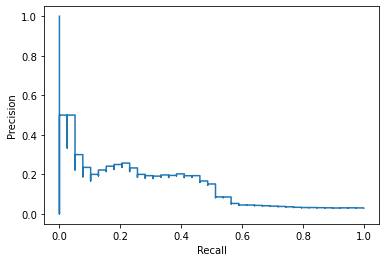

In [151]:
#Precision/Recall 
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=grid.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

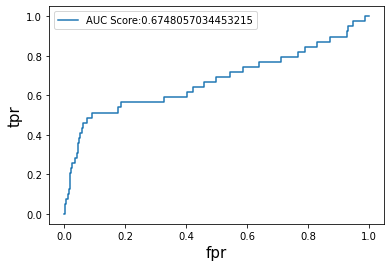

In [152]:
#Plot the ROC curve
fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:,1])

auc_score = auc(fpr,tpr)
plt.plot(fpr,tpr,label="AUC Score:" + str(auc_score))
plt.xlabel('fpr',fontsize='15')
plt.ylabel('tpr',fontsize='15')
plt.legend(loc='best')

In [153]:
# create confusion matrix and add scores to table
cnf_matrix = confusion_matrix(y_test,y_pred)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


#eval
Model = 'SVM' 
TPR = [round(num, 2) for num in TPR]
FPR = [round(num, 2) for num in FPR]
precision = [round(num, 2) for num in PPV]
recall = [round(num, 2) for num in TPR]
accuracy = [round(num, 2) for num in ACC]
f1_value = round(f1_score(y_pred, y_test),2)
row = [Model, TPR, FPR, precision, recall, accuracy, f1_value]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,TPR,FPR,precision,recall,accuracy,f1-value
0,Random Forest,"[1.0, 0.08]","[0.92, 0.0]","[0.97, 0.75]","[1.0, 0.08]","[0.97, 0.97]",0.14
1,Gradient Boosted Trees,"[0.99, 0.33]","[0.67, 0.01]","[0.98, 0.59]","[0.99, 0.33]","[0.97, 0.97]",0.43
2,Gradient Boosted Trees with Early Stopping,"[0.99, 0.31]","[0.69, 0.01]","[0.98, 0.41]","[0.99, 0.31]","[0.97, 0.97]",0.35
3,Extra Trees,"[1.0, 0.0]","[1.0, 0.0]","[0.97, nan]","[1.0, 0.0]","[0.97, 0.97]",0.00
4,SVM,"[1.0, 0.03]","[0.97, 0.0]","[0.97, 0.5]","[1.0, 0.03]","[0.97, 0.97]",0.05


## Logistic Regression Model

In [154]:
# create logistic model
log_clf = LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')

log_model = log_clf.fit(X_train, y_train)

In [155]:
# kfold validation
score = cross_val_score(log_clf, X_train, y_train, cv=5, verbose=3)
score.mean()

[CV] END ................................ score: (test=0.973) total time=   0.0s
[CV] END ................................ score: (test=0.969) total time=   0.0s
[CV] END ................................ score: (test=0.973) total time=   0.0s
[CV] END ................................ score: (test=0.966) total time=   0.0s
[CV] END ................................ score: (test=0.969) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.9700883898087369

In [156]:
y_pred = log_model.predict(X_test)
y_pred_proba = log_clf.predict_proba(X_test)
y_score = log_clf.decision_function(X_test)

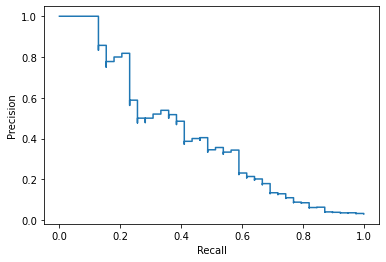

In [157]:
#Precision/Recall 
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=log_clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

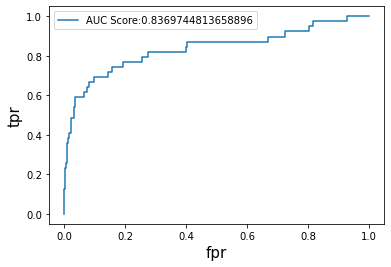

In [158]:
# create ROC curve
fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:,1])

auc_score = auc(fpr,tpr)
plt.plot(fpr,tpr,label="AUC Score:" + str(auc_score))
plt.xlabel('fpr',fontsize='15')
plt.ylabel('tpr',fontsize='15')
plt.legend(loc='best')

In [159]:
# create confusion matrix and add scores to table
cnf_matrix = confusion_matrix(y_test,y_pred)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#eval
Model = 'Logistic Regression' 
TPR = [round(num, 2) for num in TPR]
FPR = [round(num, 2) for num in FPR]
precision = [round(num, 2) for num in PPV]
recall = [round(num, 2) for num in TPR]
accuracy = [round(num, 2) for num in ACC]
f1_value = round(f1_score(y_pred, y_test),2)
row = [Model, TPR, FPR, precision, recall, accuracy, f1_value]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,TPR,FPR,precision,recall,accuracy,f1-value
0,Random Forest,"[1.0, 0.08]","[0.92, 0.0]","[0.97, 0.75]","[1.0, 0.08]","[0.97, 0.97]",0.14
1,Gradient Boosted Trees,"[0.99, 0.33]","[0.67, 0.01]","[0.98, 0.59]","[0.99, 0.33]","[0.97, 0.97]",0.43
2,Gradient Boosted Trees with Early Stopping,"[0.99, 0.31]","[0.69, 0.01]","[0.98, 0.41]","[0.99, 0.31]","[0.97, 0.97]",0.35
3,Extra Trees,"[1.0, 0.0]","[1.0, 0.0]","[0.97, nan]","[1.0, 0.0]","[0.97, 0.97]",0.00
4,SVM,"[1.0, 0.03]","[0.97, 0.0]","[0.97, 0.5]","[1.0, 0.03]","[0.97, 0.97]",0.05
5,Logistic Regression,"[1.0, 0.13]","[0.87, 0.0]","[0.97, 0.83]","[1.0, 0.13]","[0.97, 0.97]",0.22


## Naïve Bayes model

In [160]:
 # create naive bayes model
 nb_clf = GaussianNB()
 nb_model = nb_clf.fit(X_train, np.ravel(y_train))

In [161]:
# kfold cross validation
score = cross_val_score(nb_clf, X_train, y_train, cv=5, verbose=3)
score.mean()

[CV] END ................................ score: (test=0.094) total time=   0.0s
[CV] END ................................ score: (test=0.213) total time=   0.0s
[CV] END ................................ score: (test=0.073) total time=   0.0s
[CV] END ................................ score: (test=0.064) total time=   0.0s
[CV] END ................................ score: (test=0.072) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.10322265370481379

In [162]:
y_pred = nb_model.predict(X_test)
y_pred_proba = nb_clf.predict_proba(X_test)

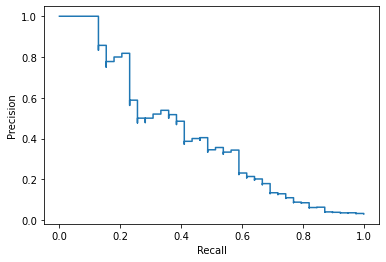

In [163]:
#Precision/Recall 
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=nb_clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

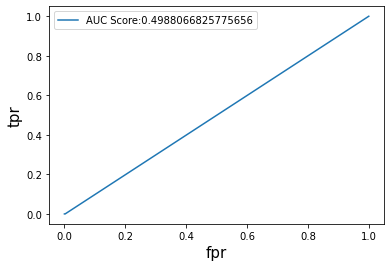

In [164]:
# create ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:,1])

auc_score = auc(fpr,tpr)
plt.plot(fpr,tpr,label="AUC Score:" + str(auc_score))
plt.xlabel('fpr',fontsize='15')
plt.ylabel('tpr',fontsize='15')
plt.legend(loc='best')

In [165]:
# create confusion matrix and add scores to table
cnf_matrix = confusion_matrix(y_test,y_pred)
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#eval
Model = 'naive bayes'
TPR = [round(num, 2) for num in TPR]
FPR = [round(num, 2) for num in FPR]
precision = [round(num, 2) for num in PPV]
recall = [round(num, 2) for num in TPR]
accuracy = [round(num, 2) for num in ACC]
f1_value = round(f1_score(y_pred, y_test),2)
row3 = [Model, TPR, FPR, precision, recall, accuracy, f1_value]
results = results.append(pd.DataFrame([row3], columns=results.columns), ignore_index=True)
results

<ipython-input-165-37ca99ea7a26>:18: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
<ipython-input-165-37ca99ea7a26>:20: RuntimeWarning: invalid value encountered in true_divide
  NPV = TN/(TN+FN)
<ipython-input-165-37ca99ea7a26>:26: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)


,Model,TPR,FPR,precision,recall,accuracy,f1-value
0,Random Forest,"[1.0, 0.08]","[0.92, 0.0]","[0.97, 0.75]","[1.0, 0.08]","[0.97, 0.97]",0.14
1,Gradient Boosted Trees,"[0.99, 0.33]","[0.67, 0.01]","[0.98, 0.59]","[0.99, 0.33]","[0.97, 0.97]",0.43
2,Gradient Boosted Trees with Early Stopping,"[0.99, 0.31]","[0.69, 0.01]","[0.98, 0.41]","[0.99, 0.31]","[0.97, 0.97]",0.35
3,Extra Trees,"[1.0, 0.0]","[1.0, 0.0]","[0.97, nan]","[1.0, 0.0]","[0.97, 0.97]",0.00
4,SVM,"[1.0, 0.03]","[0.97, 0.0]","[0.97, 0.5]","[1.0, 0.03]","[0.97, 0.97]",0.05
5,Logistic Regression,"[1.0, 0.13]","[0.87, 0.0]","[0.97, 0.83]","[1.0, 0.13]","[0.97, 0.97]",0.22
6,naive bayes,"[1.0, 0.0]","[1.0, 0.0]","[0.97, nan]","[1.0, 0.0]","[0.97, 0.97]",0.00
